In [113]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import keras
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split as tts

In [114]:
dataset = pd.read_csv("data/iplmatches.csv")

In [115]:
dataset.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [104]:
dataset.info()
encoder = LabelEncoder()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [105]:

conditions = [dataset["venue"] == "Rajiv Gandhi International Stadium, Uppal",dataset["venue"] == "Maharashtra Cricket Association Stadium",
              dataset["venue"] == "Saurashtra Cricket Association Stadium", dataset["venue"] == "Holkar Cricket Stadium",
              dataset["venue"] == "M Chinnaswamy Stadium",dataset["venue"] == "Wankhede Stadium",
              dataset["venue"] == "Eden Gardens",dataset["venue"] == "Feroz Shah Kotla",
              dataset["venue"] == "Punjab Cricket Association IS Bindra Stadium, Mohali",dataset["venue"] == "Green Park",
              dataset["venue"] == "Punjab Cricket Association Stadium, Mohali",dataset["venue"] == "Dr DY Patil Sports Academy",
              dataset["venue"] == "Sawai Mansingh Stadium", dataset["venue"] == "MA Chidambaram Stadium, Chepauk", 
              dataset["venue"] == "Newlands", dataset["venue"] == "St George's Park" , 
              dataset["venue"] == "Kingsmead", dataset["venue"] == "SuperSport Park",
              dataset["venue"] == "Buffalo Park", dataset["venue"] == "New Wanderers Stadium",
              dataset["venue"] == "De Beers Diamond Oval", dataset["venue"] == "OUTsurance Oval", 
              dataset["venue"] == "Brabourne Stadium",dataset["venue"] == "Sardar Patel Stadium", 
              dataset["venue"] == "Barabati Stadium", dataset["venue"] == "Vidarbha Cricket Association Stadium, Jamtha",
              dataset["venue"] == "Himachal Pradesh Cricket Association Stadium",dataset["venue"] == "Nehru Stadium",
              dataset["venue"] == "Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium",dataset["venue"] == "Subrata Roy Sahara Stadium",
              dataset["venue"] == "Shaheed Veer Narayan Singh International Stadium",dataset["venue"] == "JSCA International Stadium Complex",
              dataset["venue"] == "Sheikh Zayed Stadium",dataset["venue"] == "Sharjah Cricket Stadium",
              dataset["venue"] == "Dubai International Cricket Stadium",dataset["venue"] == "M. A. Chidambaram Stadium",
              dataset["venue"] == "Feroz Shah Kotla Ground",dataset["venue"] == "M. Chinnaswamy Stadium",
              dataset["venue"] == "Rajiv Gandhi Intl. Cricket Stadium" ,dataset["venue"] == "IS Bindra Stadium",dataset["venue"] == "ACA-VDCA Stadium"]
dataset = ['Hyderabad', 'Mumbai', 'Rajkot',"Indore","Bengaluru","Mumbai","Kolkata","Delhi","Mohali","Kanpur","Mohali","Pune","Jaipur","Chennai","Cape Town","Port Elizabeth","Durban",
          "Centurion",'Eastern Cape','Johannesburg','Northern Cape','Bloemfontein','Mumbai','Ahmedabad','Cuttack','Jamtha','Dharamshala','Chennai','Visakhapatnam','Pune','Raipur','Ranchi',
          'Abu Dhabi','Sharjah','Dubai','Chennai','Delhi','Bengaluru','Hyderabad','Mohali','Visakhapatnam']


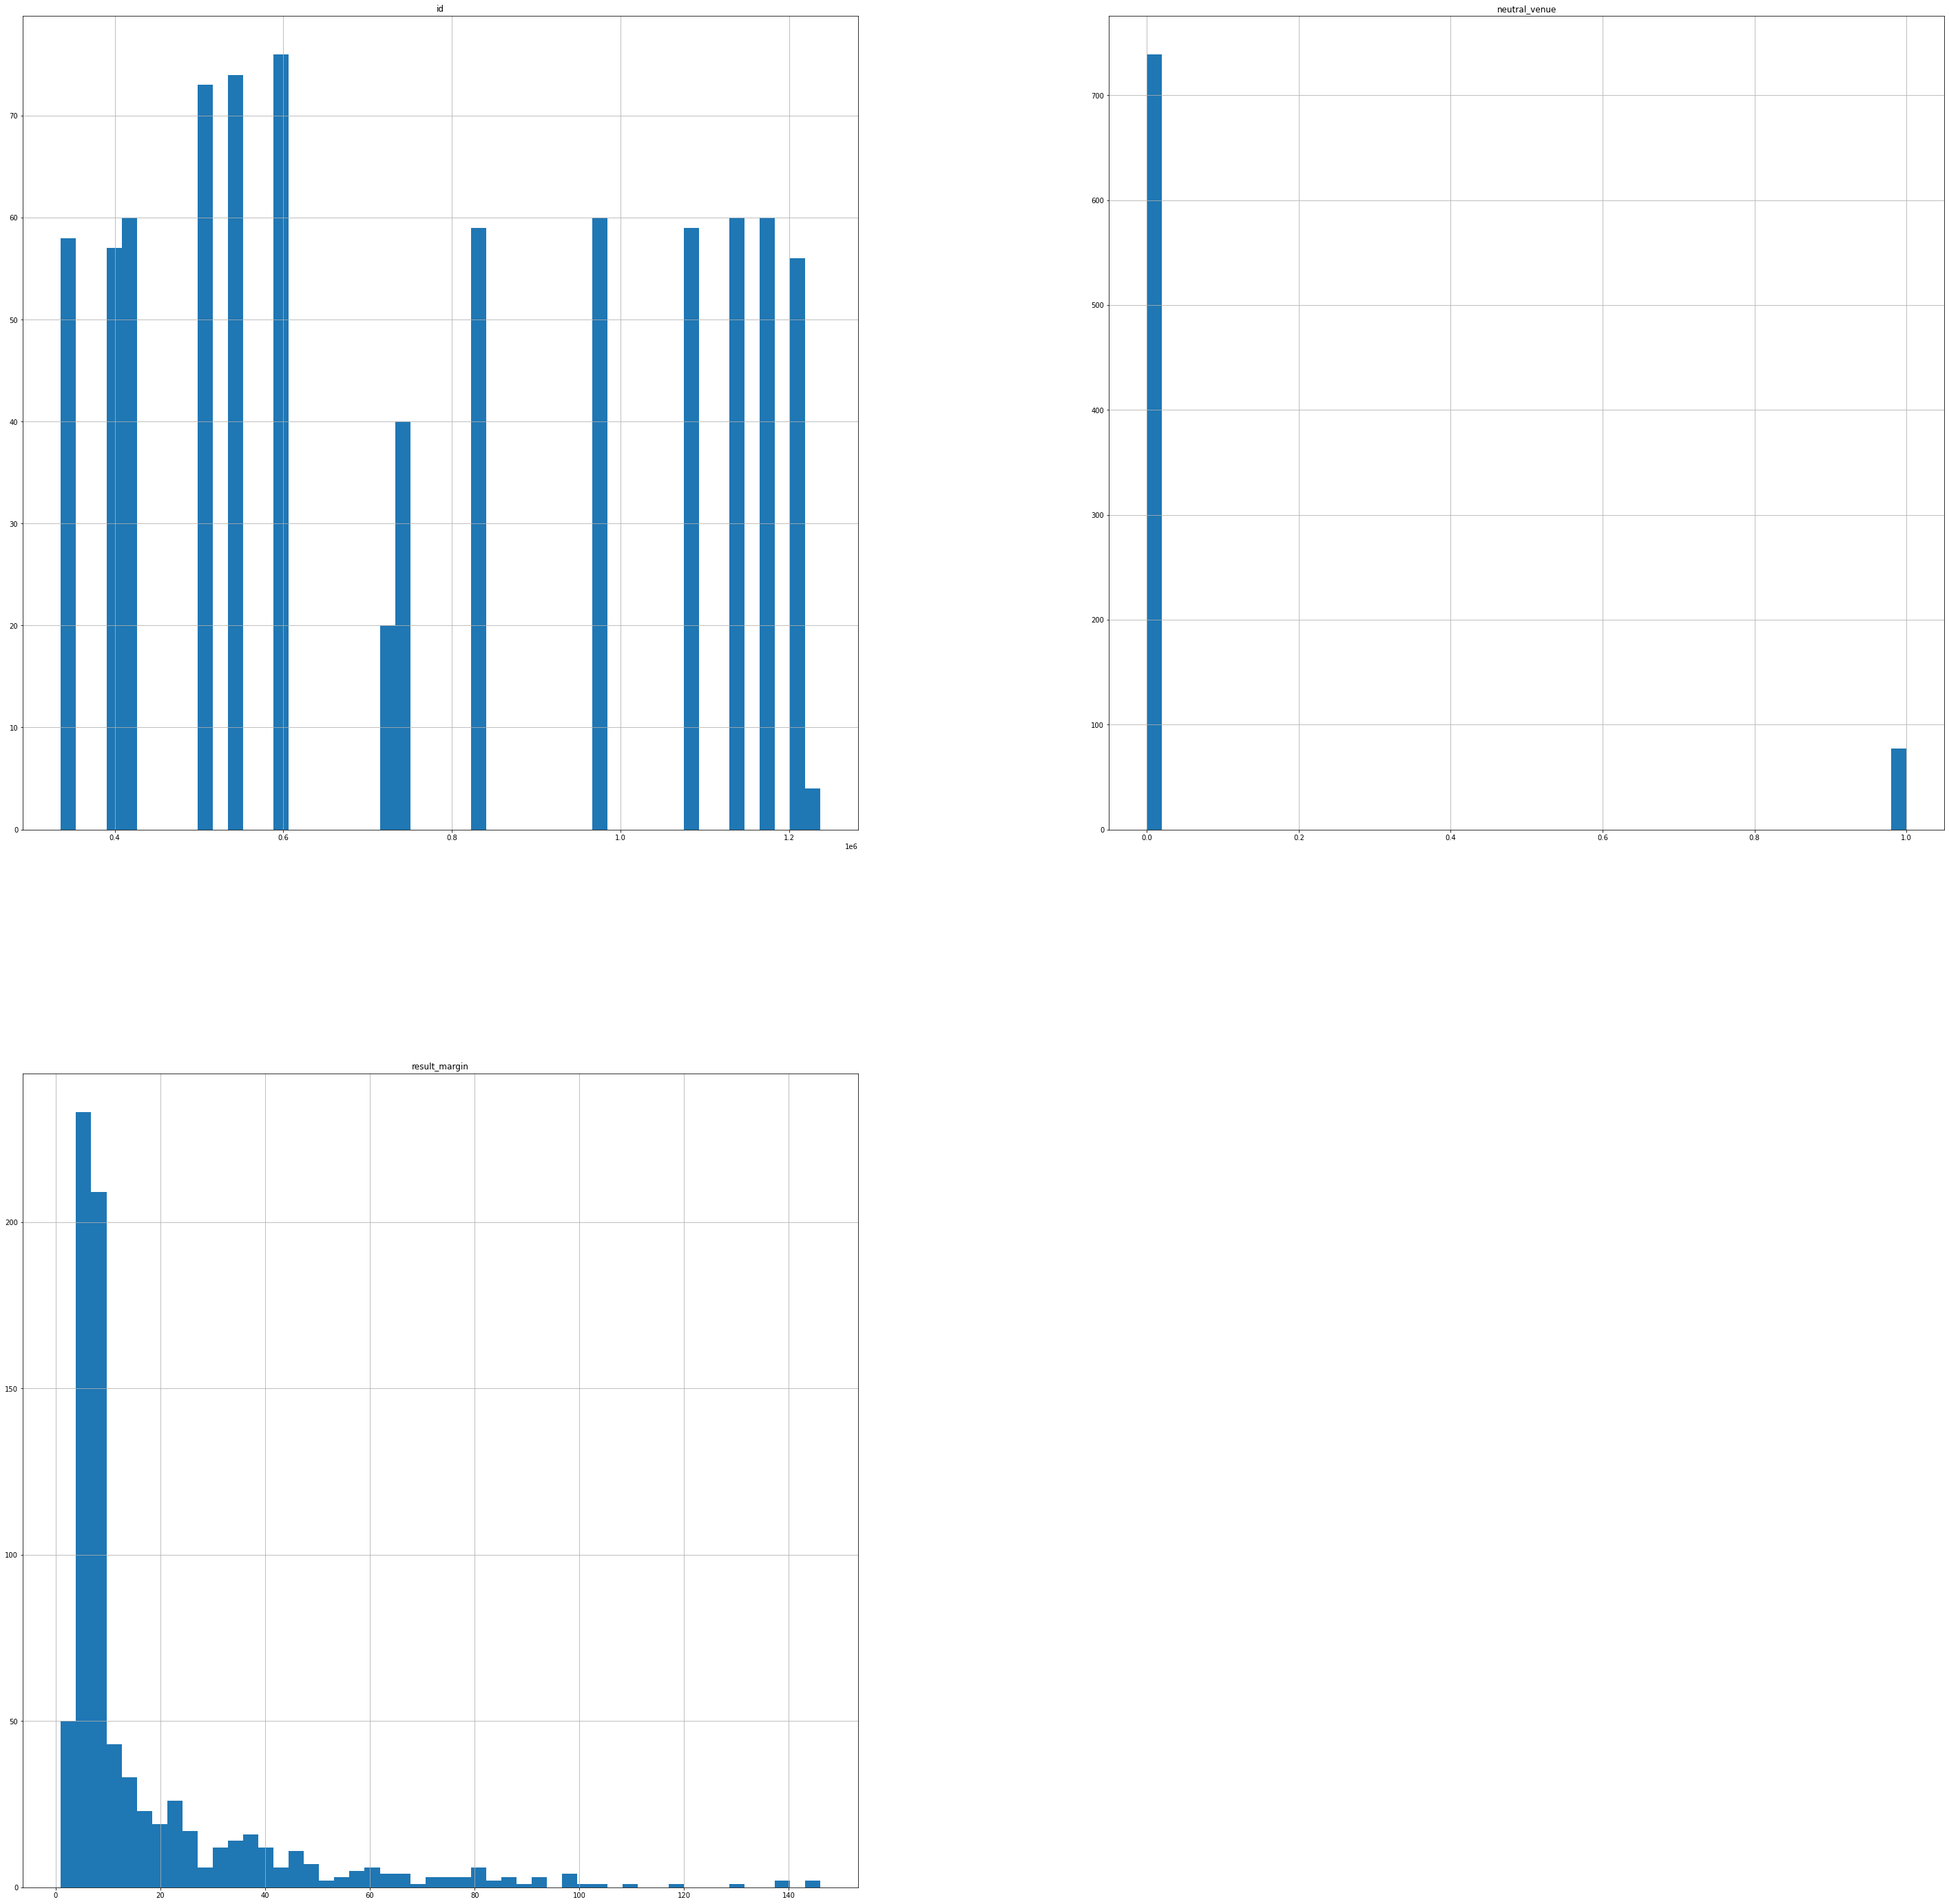

In [116]:
dataset.hist(bins = 50,figsize=(50,50))
plt.show()

In [112]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
print(X)
print(y)

AttributeError: 'list' object has no attribute 'iloc'

In [109]:
X_train,X_test,y_train,y_test = tts(X,y)

In [110]:
print(X_test)

[[1136613 'Jaipur' '2018-05-19' ... 'N' nan 'BNJ Oxenford']
 [1136572 'Chandigarh' '2018-04-15' ... 'N' nan 'VA Kulkarni']
 [598006 'Mumbai' '2013-04-09' ... 'N' nan 'M Erasmus']
 ...
 [392231 'Centurion' '2009-05-18' ... 'N' nan 'SJA Taufel']
 [829795 'Mumbai' '2015-05-10' ... 'N' nan 'JD Cloete']
 [1136576 'Chandigarh' '2018-04-19' ... 'N' nan 'NJ Llong']]


AttributeError: 'numpy.ndarray' object has no attribute 'head'